In [1]:
from pylab import rcParams
%pylab inline

import corona as crn
import pandas as pd
from datetime import date 
confirmed, death, recovered = crn.load_data()
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
rcParams['figure.figsize'] = 12, 6

## Select Data from Countries and dates bounds 

In [3]:
request_ue = dict(countries=["France", "Italy",  "Spain", "Germany"], date_min="2020-02-20")
# for plot 
styles = {"France":{"color":"blue"}, "Italy":{"color":"green"}, "Spain":{"color":"red"}, "Germany":{"color":"black"} }
c_ue, d_ue, r_ue = (crn.get_subdata(d, **request_ue) for d in (confirmed, death, recovered))
d_ue

,Province/State,Country/Region,Lat,Long,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
157,France,France,46.2276,2.2137,1,1,1,1,1,1,...,19,19,33,48,48,79,91,91,148,148
16,NaN,Italy,43.0000,12.0000,0,1,2,3,7,10,...,366,463,631,827,827,1266,1441,1809,2158,2503
18,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,17,28,35,54,55,133,195,289,342,533
11,NaN,Germany,51.0000,9.0000,0,0,0,0,0,0,...,0,2,2,3,3,7,9,11,17,24


## Basic time seri plot of the data

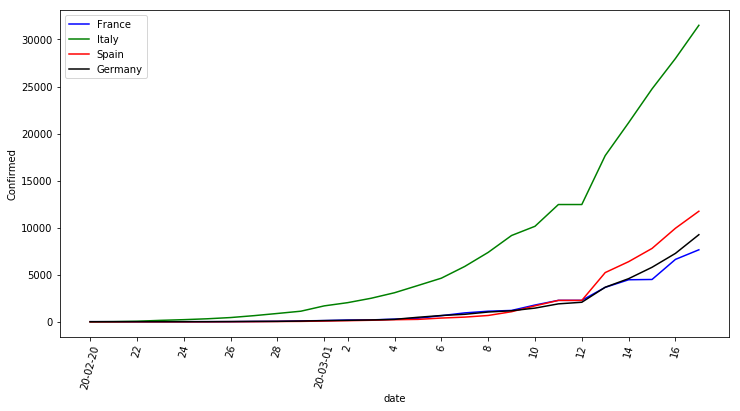

In [4]:
_ =crn.plot_data(c_ue , ylabel="Confirmed", styles=styles)

## Fit data 
One can use the `get_subdata` method to subset the fit. 
The `sfit_data` is fitting a $A 2^{t/T}$ function where T will represent the doubling period  
The `efit_data` if fitting a $A \exp{t/T}$

Bellow the last 10 days is fitted, showing the doubling time for different countries 

,country,T,A,rep,ftype,start_date,end_date,label
France,France,3.152557,1090.706782,$A 2^{t/T}$,2,2020-03-08,2020-03-17,France T=3.15
Germany,Germany,2.689001,918.165665,$A 2^{t/T}$,2,2020-03-08,2020-03-17,Germany T=2.69
Italy,Italy,4.194082,7428.755714,$A 2^{t/T}$,2,2020-03-08,2020-03-17,Italy T=4.19
Spain,Spain,2.162793,798.511092,$A 2^{t/T}$,2,2020-03-08,2020-03-17,Spain T=2.16


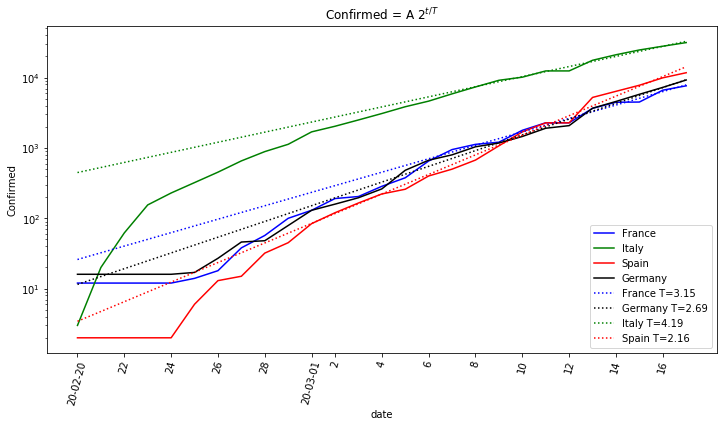

In [5]:
result = crn.fit_data(crn.get_subdata(c_ue, date_min= crn.today(-10)), ftype='2')
crn.plot_data(c_ue , ylabel="Confirmed", title = "Confirmed = A $2^{t/T}$", log=True, fit_result=result, styles=styles)
result

Fits are DataFrame we can cat them together, for instance, drastic measure were taken in Italie on the 10th of March, the graph bellow show the fit before and after the period 

,country,T,A,rep,ftype,start_date,end_date,label
Italy,Italy,4.096736,10148.907884,$A 2^{t/T}$,2,2020-03-10,2020-03-17,Italy T=4.10
Italy,Italy,3.347056,1673.904762,$A 2^{t/T}$,2,2020-03-01,2020-03-10,Italy T=3.35
Italy,Italy,1.680342,85.087431,$A 2^{t/T}$,2,2020-02-22,2020-02-28,Italy T=1.68


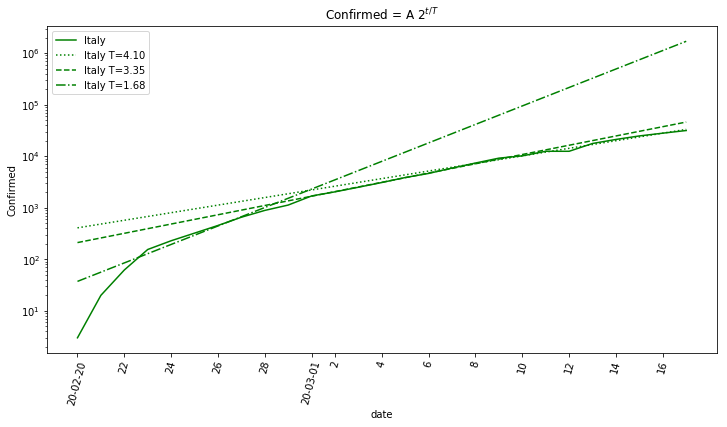

In [6]:
c_it = crn.get_subdata(confirmed, countries=["Italy"], date_min="2020-02-20")

dates_boundaries = [("2020-03-10", None), ("2020-03-01","2020-03-10"), ("2020-02-22", "2020-02-28")]
dataset = [crn.get_subdata(c_it, date_min=d1, date_max=d2) for (d1, d2) in dates_boundaries]
result = crn.fit_severals(dataset)

ax = crn.plot_data(c_it, ylabel="Confirmed", title = "Confirmed = A $2^{t/T}$", log=True, fit_result=result, styles=styles)
result

We can get data subset from a slidding window period 

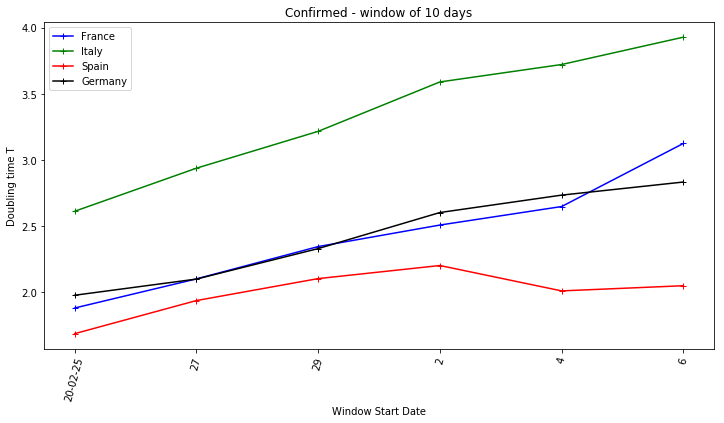

In [7]:
# get a list of (date_min, date_max) with a window of 6 days every 2 days

def plot_d_T(data, title="", window=10, step=2):
    dates = crn.date_ranges(window=window, step=step, start_date="2020-02-25")

    for country in ['France', 'Italy', 'Spain', 'Germany']:
        dataset = [crn.get_subdata(data, countries=[country], date_min=d1, date_max=d2) for d1, d2 in dates]
        result = crn.fit_severals(dataset)
        #result
        x = result['start_date'] 
        plot(x, result['T'], label=country, marker="+", **styles.get(country, {}))
        crn.set_date_xticks(x) # set the ticks graph properly 
    gca().set(xlabel="Window Start Date", ylabel="Doubling time T", title=title)
    gca().legend()
plot_d_T(confirmed, "Confirmed - window of 10 days")

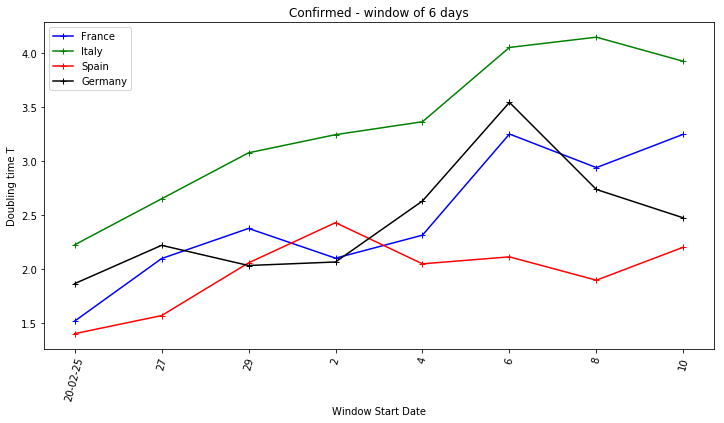

In [11]:
plot_d_T(confirmed, "Confirmed - window of 6 days", window=6)

Samething for death 

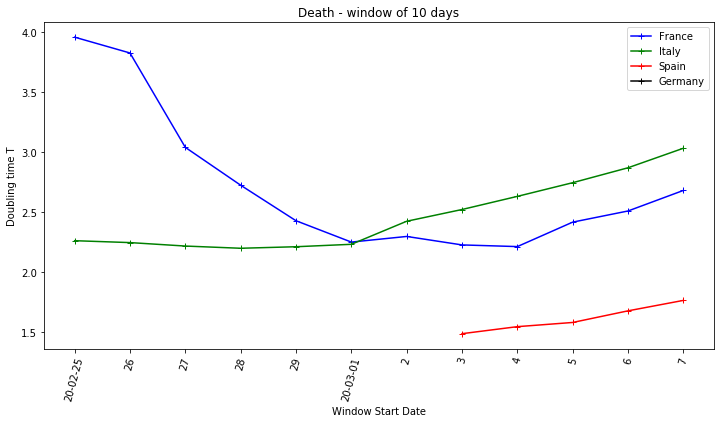

In [8]:
plot_d_T(death, "Death - window of 10 days", step=1)

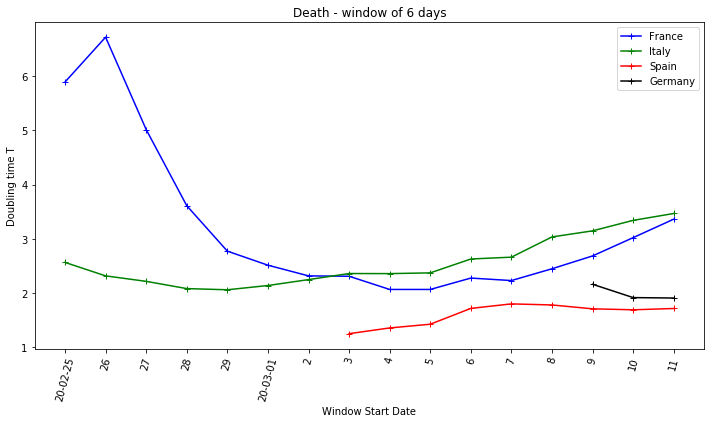

In [9]:
plot_d_T(death, "Death - window of 6 days", window=6, step=1)

# some proportions

## Death over confirmed 

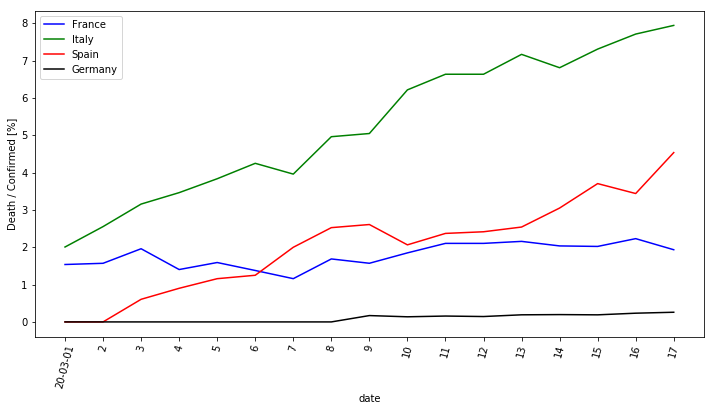

In [10]:
crn.plot_proportion( *(crn.get_subdata(d, date_min="2020-03-01") for d in (d_ue, c_ue)), 
                    ylabel="Death / Confirmed [%]", styles=styles)
gcf().set_size_inches(12,6)